In [1]:
import simulation_settings as ss
import ship as ship
import constants
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import glob
import driver
import time
import datetime
from tqdm.notebook import tqdm, trange
import statistics


In [2]:
gg = constants.gg
rho = constants.rho
beta = constants.beta
dt = constants.dt

In [3]:
#reset variables
if('ww' in globals()):del ww
if('pp' in globals()):del pp
if('dd' in globals()):del dd

In [4]:
scale = 3.11/25

In [5]:
#create environment JONSWAP(num_waves, T_1, H_third)
T_1 = 2.8
# T_1 = 2*math.pi/2.0
H_3 = 0.3
ww = ss.JONSWAP(100,T_1,H_3)
# ww = ss.Water(H_3, 2*math.pi/T_1)
print(T_1/math.sqrt(scale))
print(H_3/scale)

7.938671679732397
2.4115755627009645


0.07853981633974483


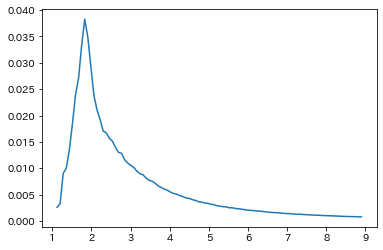

In [6]:
if(type(ww) == ss.JONSWAP):
    x=np.arange(ww.min_omega ,ww.min_omega+ww.N*ww.delta_omega,ww.delta_omega)
    wl=[]
    amp=[]

    for i in range(ww.N):
        amp.append(ww.waves[i].amp)
        wl.append(ww.waves[i].length)

    # plt.plot(x,wl)
    # plt.axhline(y=3.11)
    plt.plot(x,amp)

    print(ww.delta_omega)

In [7]:
####################################
# Max Speed -> 3.5m/s (10m/s @ real scale)
# Target Low Speed -> 0.35m/s(simulation scale; 1m/s @ real scale)
# Refer to scaling.ipynb
####################################
start_time = time.perf_counter()

power=['engine','motor']
props=['fpp','cpp']
power_type = power[0]
prop_type = props[0]

# IMU_en = True

# q = np.array([[10**3, 0], [0, 10**8]])

pp = ship.Ship2(power_type,prop_type,Benchmark=True)


t=0.0
num = 60*60*1000

dl = []
xl = []
xvl = []
xvl_int = []
xal = []
zl = [] 
zvl= []
zal =[]
eng = []
pl = []
pvl=[]
IMU_ax = []
IMU_az = []
IMU_ry = []
rev=[]
t_rev=[]
wil = []
fl = []
tfl=[]

fxl=[]

PID_vel_err=[]
PID_acc_err=[]
PID_err=[]

PID_curr=[]
PID_targ=[]
PID_star=[]

fps = 50
limit = round(round(1./dt)/fps)

filename = f'T{T_1}_H{H_3}_{power_type},{prop_type}'
with open(f'{filename}.csv', 'a') as the_file:
        the_file.write('time,posx,posz,velx,velz,accx,accz,pitch,draught,force\n')

fileList = glob.glob('./output/*.png')
for filePath in fileList:
    try:
        os.remove(filePath)
    except:
        print("Error while deleting file : ", filePath)

filenamecount = 0
velx_int = 0

for i in trange(num):
    pp.update(ww,t)

    if(i%100==0):
       
        # dl.append(pp.draught)
        # xl.append(pp.posx)
        # xvl.append(pp.velx)
        # xal.append(pp.accx)
        # zl.append(pp.posz)
        # zvl.append(pp.velz)
        # zal.append(pp.accz)
        # # wil.append(pp.wave_incline)
        # pl.append(pp.angle*(180/math.pi))
        # # pvl.append(pp.anglevel*(180/math.pi))
        # fl.append(pp.thr_f)
        # tfl.append(pp.target_thr_f)
        # IMU_ax.append(pp.IMU_accx)
        # IMU_az.append(pp.IMU_accz)
        # IMU_ry.append(pp.IMU_roty)
        # rev.append(pp.prop_rev)
        # t_rev.append(pp.P_target_val*pp.P_target_max)
        # xvl_int.append(velx_int)
        # PID_acc_err.append(pp.P_acc_err)
        # PID_vel_err.append(pp.P_vel_err)
        # PID_err.append(pp.P_err)
        # PID_curr.append(pp.P_current_val)
        # PID_star.append(pp.P_start_val)
        # PID_targ.append(pp.P_target_val)
        # fxl.append(pp.fxl)



        with open(f'{filename}.csv', 'a') as the_file:
            the_file.write(f'{t},{pp.posx}, {pp.posz}, {pp.velx}, {pp.velz}, {pp.accx}, {pp.accz}, {pp.angle}, {pp.draught}, {pp.thr_f}\n')


        # graph
        # if(i%limit==0):
        #     xdata = np.arange(-4,8,0.05)
        #     ydata = np.array([ww.get(x,t) for x in xdata])
        #     fig, ax = plt.subplots()
        #     ax.set_xlim(-4.0,8.0)
        #     ax.set_ylim(-1,1)
        #     ax.plot(xdata,ydata)
        #     ax.scatter(pp.posx,pp.posz,s=10)
            
        #     ts = ax.transData
        #     coords = ts.transform([pp.posx,pp.posz])
        #     tr = mpl.transforms.Affine2D().rotate_around(coords[0], coords[1], pp.angle)
        #     tt = ts + tr
        #     rec0 = patches.Rectangle((pp.posx-pp.pl/2,pp.posz-pp.ph),pp.pl,pp.ph,linewidth=1,edgecolor='r',facecolor='none', transform=tt)
        #     ax.add_patch(rec0)
            
        #     # ax.arrow(pp.posx,pp.posz,pp.posx+pp.accx/10,pp.posz+pp.accz/10)

        #     for i in range(len(pp.fxl)):
        #         if(i%10 ==0) : ax.arrow(pp.posx,pp.posz,pp.posx+pp.fxl[i]/50,pp.posz+pp.fzl[i]/100)

        #     ax.text(-1.5,0.6,f"Velx = {pp.velx:.2f}[m/s]")

        #     ax.set_aspect('equal', adjustable='box')

        #     ax.set_title("Wave Profile T_1 =" + str(T_1) + "[s], H_1/3 =" + str(H_3) + "[m], t=" + str(round(t)) + "[s]")
        #     fig.savefig("./output/"+f"{filenamecount:04d}.png")
        #     plt.clf()
        #     plt.close()
        #     filenamecount += 1
    t+=dt
    


# os.system(f'ffmpeg -y -r {fps} -f image2 -i ./output/%04d.png -vcodec libx264 -pix_fmt yuv420p ./video/PID_T{T_1}_H{H_3}_F{force}_V{target_vel}.mp4')
# os.system("ffmpeg -y -r 50 -f image2 -i ./output/%04d.png -vcodec libx264 -pix_fmt yuv420p ./video/test.mp4")
end_time = time.perf_counter()

print(end_time-start_time)

  0%|          | 0/3600000 [00:00<?, ?it/s]

2062649
-3.051566386161825
-3.0639484922746707
-3.0762527952981062
-3.088479132582079
-3.100627343925392
-3.11269727156744
-3.1246887601850837
-3.1366016568860093
-3.1484358112029014
-3.1601910750886835
-3.171867302910291
-3.183464351442673
-3.1949820798635784
-3.2064203497463533
-3.2177790250559792
-3.2290579721409616
-3.2402570597289726
-3.2513761589197356
-3.2624151431794726
-3.2733738883342345
-3.284252272563204
-3.295050176394533
-3.3057674826962016
-3.3164040766712457
-3.326959845851115
-3.33743468008874
-3.347828471552813
-3.358141114720019
-3.36837250636972
-3.378522545575865
-3.388591133702055
-3.398578174392657
-3.4084835735682484
-3.418307239416672
-3.428049082387893
-3.437709015186181
-3.447286952762754
-3.4567828123097715
-3.4661965132531125
-3.4755279772448993
-3.4847771281559994
-3.493943892070281
-3.503028197275696
-3.5120299742584495
-3.520949155695136
-3.5297856764457127
-3.5385394735453826
-3.5472104861983573
-3.555798655769878
-3.564303925779052
-3.5727262418908303


KeyboardInterrupt: 

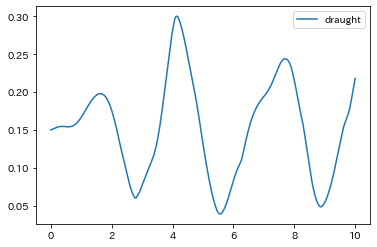

In [9]:
fig, ax = plt.subplots()
tdata = np.arange(0,num*dt,dt)
# ax.set_ylim(-0.5,0.5)
# ax.plot(tdata,xl,label="pos")
# ax.plot(tdata,zvl,label="vel")
# ax.plot(tdata,zal,label="acc")
# ax.plot(tdata,dl,label="draught")
# ax.plot(tdata,eng,label="energy")
# ax.plot(tdata,pl,label="pitch angle")
# ax.plot(xl,zl)

# ax.plot(tdata,xvl,label="vel")

ax.legend()

In [13]:
df = pd.read_csv("T2.8_H0.3_engine,fpp.csv")
tdata = df['time']
xl = df['posx']
zl = df['posz']
xvl = df['velx']
xal = df['accx']
zal = df['accz']
pl = df['pitch']
fl = df['force']
dl = df['draught']

0.37614498633049515 -0.011159697696393496
-3370.5660902629534


Text(0, 0.5, 'Pitch angle[deg]')

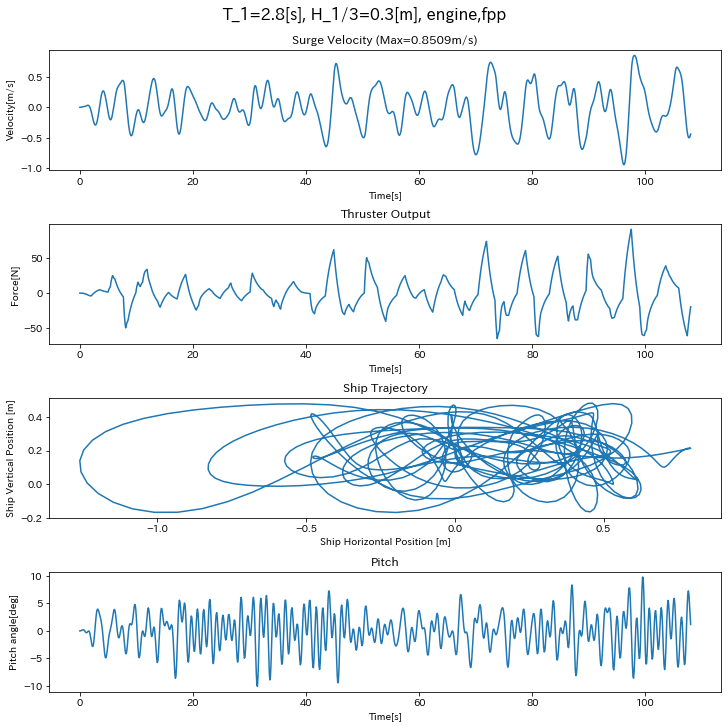

In [19]:
import statistics
xvl_trunc = xvl[-round(len(xvl)/2):]
stdev = statistics.stdev(xvl_trunc)
mean = statistics.mean(xvl_trunc)
cv = stdev/mean*100
print(stdev,mean)
print(cv)



fig, (ax_xvel, ax_thr, ax_pos, ax_pitch) = plt.subplots(nrows=4,figsize=(10,10),constrained_layout=True)


fig.suptitle( f'T_1={T_1}[s], H_1/3={H_3}[m], {power_type},{prop_type}' , fontsize=16)
fig.set_facecolor('white')

ax_xvel.plot(tdata,xvl)
# ax_xvel.plot(tdata,xvl_int)
ax_xvel.set_title(f'Surge Velocity (Max={max(xvl):.4f}m/s)')
ax_xvel.set_xlabel('Time[s]')
ax_xvel.set_ylabel('Velocity[m/s]')

# ax_xvel.text(1,0.15, f'P Coeff:{P_coeff}')
# ax_xvel.text(1,0.1,f'Coeff of Variance:{cv:.04f}%')

# ax_rev.plot(tdata,prop_pitch)
# ax_rev.plot(tdata,t_prop_pitch)
# ax_rev.set_title('prop angle')

ax_thr.plot(tdata,fl)
# ax_thr.plot(tdata,hsl)
ax_thr.set_title('Thruster Output')
ax_thr.set_xlabel('Time[s]')
ax_thr.set_ylabel('Force[N]')


ax_pos.plot(xl,zl)
ax_pos.set_title('Ship Trajectory')
ax_pos.set_xlabel('Ship Horizontal Position [m]')
ax_pos.set_ylabel('Ship Vertical Position [m]')


ax_pitch.plot(tdata,[x*180/math.pi for x in pl])
# ax_pitch.plot(tdata,wil)
ax_pitch.set_title('Pitch')
ax_pitch.set_xlabel('Time[s]')
ax_pitch.set_ylabel('Pitch angle[deg]')


# ax_accx.plot(tdata,xal)
# # ax_accx.plot(tdata,IMU_ax)
# ax_accx.set_title('accx')
# ax_xvel.set_xlabel('Time[s]')


# ax_accz.plot(tdata,zal)
# # ax_accz.plot(tdata,IMU_az)
# ax_accz.set_title('accz')
# ax_xvel.set_xlabel('Time[s]')


# fig.savefig("./figures/"+f"{filename}-{time.time()}.png")

Text(0, 0.5, 'Occurences (with dt = 0.1s)')

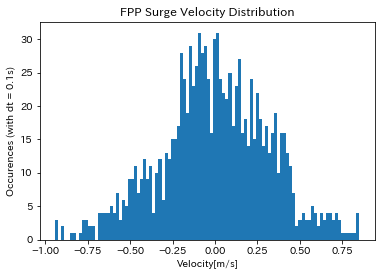

In [17]:
plt.hist(xvl,bins=100)
plt.title('FPP Surge Velocity Distribution')
plt.xlabel('Velocity[m/s]')
plt.ylabel('Occurences (with dt = 0.1s)')

Text(0, 0.5, 'Occurences (with dt = 0.1s)')

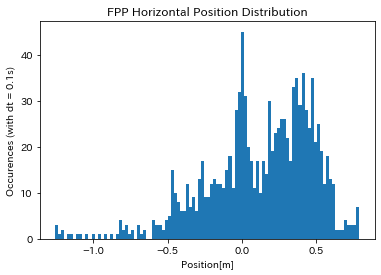

In [18]:
plt.hist(xl,bins=100)
plt.title('FPP Horizontal Position Distribution')
plt.xlabel('Position[m]')
plt.ylabel('Occurences (with dt = 0.1s)')

In [12]:
temp = 0

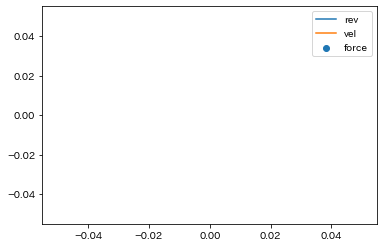

In [13]:
middle = 15*1000
spread = 5000
begin = middle - spread
end = middle + spread

plt.scatter(tdata[begin:end],[x/50 for x in fl][begin:end],label="force")
plt.plot(tdata[begin:end],rev[begin:end],label='rev')
plt.plot(tdata[begin:end],xvl[begin:end],label='vel')
plt.plot(tdata[begin:end],[0]*len(tdata[begin:end]))

plt.legend()

In [14]:
temp

0